# Face Recognition Project

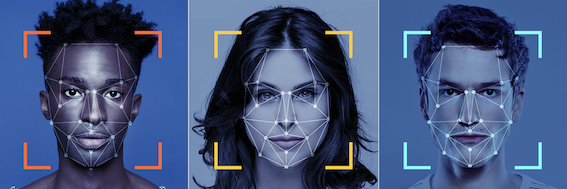

В этом проекте мы погрузимся во фреймворк распознавания лиц и обучим нейронную сеть задаче распознавания лиц,
поиграемся с потерями и метриками.
Мы будем обучать нейронную сеть на [наборе данных CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).

Как мы видим на сайте, изображения набора данных celebA выглядят так:


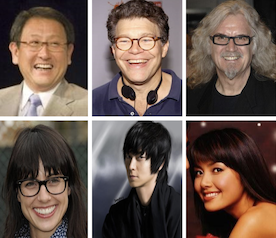

Но мы не будем обучать нейронную сеть распознаванию лиц на этих изображениях. Сначала нам нужно их предварительно обработать. Давайте посмотрим, зачем нам это нужно и как нам нужно их предварительно обработать.

Давайте посмотрим, как работают системы распознавания лиц:

## Обучение модели распознавания лиц и настройка логического вывода

В этом разделе описывается, как обучаются модели распознавания лиц, что такое выравнивание данных и как выглядит вывод модели распознавания лиц. Если вы знакомы с этим, вы можете пропустить этот раздел.

### Обучение модели

Чтобы обучить модель распознавания лиц на любом наборе данных лиц, изображения должны быть сначала выровнены. Этот шаг очень важен для достижения хорошего качества распознавания лиц.

Что такое выравнивание: оно состоит из трех шагов:
1. По заданному изображению определить ориентиры лица на изображении (координаты точек глаз, носа и рта). Здесь можно использовать отдельную нейросеть, обученную распознавать ориентиры на изображениях лица. Вы можете обратиться к [учебнику PyTorch Landmarks](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html), чтобы узнать, как это работает.
2. Поверните все изображения в наборе данных так, чтобы глаза человека на каждом изображении лежали на определенной заранее определенной горизонтальной линии.
3. Масштабируйте все изображения в наборе данных так, чтобы размеры лиц были примерно одинаковыми.

Вот пример того, что мы получим после выравнивания всех изображений Аарона Пирсола из нашего набора данных:

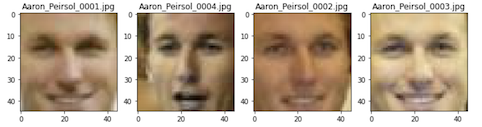

Вы видите, что глаза всех лиц лежат на одной горизонтальной линии и все лица имеют почти одинаковый размер. Если мы выровняем все изображения в наборе данных, мы сможем обучить нейронную сеть на выровненных изображениях.

**Зачем нужна процедура выравнивания**: выравнивание всех лиц в наборе данных упрощает задачу распознавания лиц для модели. Если все лица, которые видит модель, имеют одинаковый размер и имеют свои ориентиры (глаза, нос и т. д.) почти на одних и тех же участках изображения, модели легче научиться распознавать человека на изображении. Модель не должна «искать» положение лица и глаз на изображении перед распознаванием.

Если вам интересно, вы также можете обучить модель на невыровненных изображениях, но вы увидите, что она будет работать плохо. Хотя можно обучить модель распознаванию лиц без предварительного выравнивания всех лиц, но для этого потребуется огромное количество данных — больше, чем есть почти у любой компании. Единственная компания, которая открыто представила свою систему распознавания лиц, не требующую специального выравнивания, — это Facebook — их нейронная сеть была обучена на действительно огромном количестве данных с помощью специального трюка, позволяющего избежать выравнивания. Вы можете прочитать более подробную информацию [здесь](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Вывод модели

Итак, давайте посмотрим, как модель, обученная на выровненных лицах, может использоваться в реальном мире:

Предположим, вы должны компании и хотите построить систему распознавания лиц для своего рабочего офиса. Вы решили развесить по офису несколько камер и хотите, чтобы они могли распознавать лица всех ваших сотрудников, когда они сидят/ходят по офису (предоставляем вам самим решать, зачем вам такая система в вашем офисе)


Система распознавания лиц обычно состоит из 3 этапов:
- обнаружение лица
- выравнивание лица
- распознавание лица

Давайте обсудим их подробно:

**Распознавание лиц**

Когда камера висит на стене, она записывает видео и разбивает видео на отдельные изображения, например:

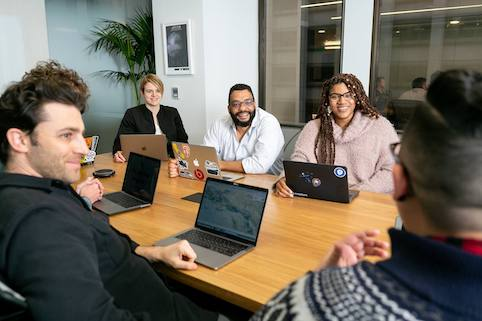

Чтобы иметь возможность распознавать все лица на фотографии, вам нужно сначала обнаружить все лица, присутствующие на фотографии, например:

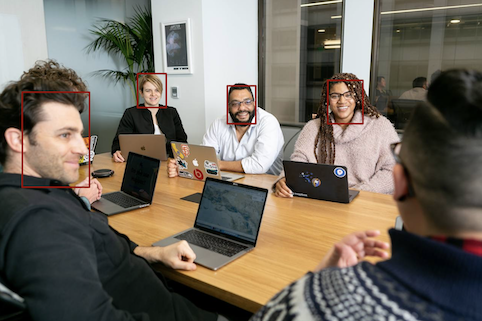

Это первая часть — обнаружение. Вы можете использовать для этого любую нейронную сеть, которая может обнаруживать людей.

**Выравнивание лица**

Второй этап заключается в выравнивании всех найденных граней. Процедура выравнивания здесь должна быть такой же, как и для выравнивания обучающих изображений.

Таким образом, мы получим изображение парня на фотографии, выровненное следующим образом:

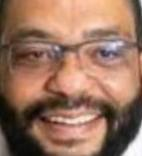

**Распознавание лица**

На третьем этапе мы используем нейронную сеть, которую мы обучили распознавать лицо.

Вот как работает конвейер моделей распознавания лиц. Вы также можете прочитать об этом подробнее на [ссылка](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (и с помощью поиска в интернете)

## Архитектура модели нейронной сети

Давайте обсудим, как должна выглядеть модель для распознавания лиц.



Самый простой и, на самом деле, наиболее часто используемый способ построения нейронной сети для распознавания лиц — построить ее как **простой классификатор**.

Предположим, у нас есть набор данных с фотографиями N разных людей. Затем мы можем построить нейронную сеть, чтобы классифицировать все изображения из набора данных по N классам. Каждый класс относится к одному уникальному человеку в наборе данных.

**Как тогда мы будем распознавать новых людей с помощью этой сети?** На самом деле мы хотим, чтобы сеть для распознавания лиц могла распознавать не только людей, которые находятся в обучающей выборке, но и почти каждого человека в мире.

Вот как: после обучения модели мы сбрасываем последний слой классификации. После этого, когда мы будем передавать изображение человека по сети, мы получим результат предпоследнего слоя — это **эмбеддинг изображения**. Имея вложения двух разных изображений, мы можем сравнить их, используя **косинусное расстояние**. Чем меньше расстояние — тем выше вероятность того, что эти две фотографии принадлежат одному человеку.

Используя эту технику, мы можем получить вложения каждого изображения — даже невидимых людей, сравнить их и выявить изображения, принадлежащие одним и тем же людям.

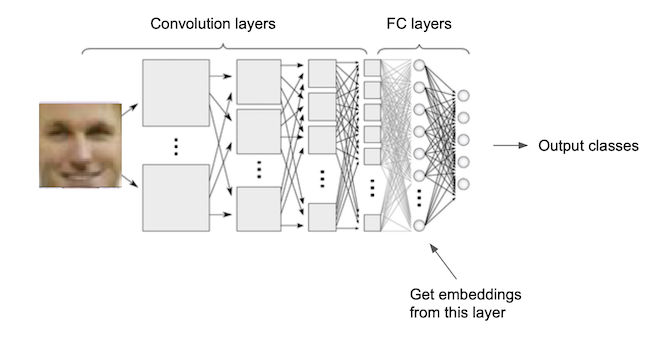

## Построим нейронную сеть для детекции лиц без использования примеров, описанных выше (это будет уже в следующем примере)

### Dataset 

Гатренируем нашу модель на наборе данных [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). Но мы будем использовать его версию, в которой все изображения выровнены и обрезаны. Скачать набор данных можно по этой ссылке: https://disk.yandex.ru/d/S8f03spLIA1wrw или с помощью кода ниже:

### Загрузим данные

In [10]:
# ! pip install wldhx.yadisk-direct
# ! curl -L $(yadisk-direct https://disk.yandex.ru/d/S8f03spLIA1wrw) -o celebA_train.zip
# ! unzip -o celebA_train.zip

In [11]:
# ! unzip -o celebA_train.zip

In [12]:
# ! ls celebA_train_500/

### Установим недостающие модули

In [13]:
# ! pip install timm
# # pip install ipywidgets
# ! pip install torchmetrics
# ! pip install pytorch_metric_learning

- celebA_imgs — folder with aligned images 
- celebA_anno.txt — file with annotations: which person each image corresponds to
- celebA_train_split.txt — file with train/val/test info

### Импортируеим модули

In [14]:
from collections import defaultdict
from PIL import Image
from pytorch_metric_learning import losses
from skimage import io, transform, data
from skimage.feature import Cascade
from skimage.io import imread
from torch import nn
from torch.optim import lr_scheduler, Adam
from torch.utils.data import Dataset
from torchmetrics.functional import pairwise_cosine_similarity
from tqdm import tqdm
# from tqdm.notebook import tqdm
import cv2
import gc
import itertools
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import timm
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms

### Функции, которые нам облегчат жизнь в этом проекте

In [15]:
def show_imgs(images_names: list of image names):
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

In [16]:
def get_paths(dataset_type='train': string):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_500/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_500/celebA_imgs/', filename))
    
    return np.array(images_paths)

In [17]:
def fit_epoch(model, train_loader, loss_fn, optimizer, sheduler=None):
    '''
    Функция обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train
    
    for i, batch in enumerate(train_loader):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        optimizer.zero_grad()
        logits = model(X_batch.to(device))
        loss = loss_fn(logits, y_batch.to(device))
        loss.backward()
        optimizer.step()
#         optimizer.zero_grad()
        losses.append(loss.item())
        y_pred = torch.argmax(logits, dim=1)
        num_correct += torch.sum(y_pred.cpu() == y_batch)
        
    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [18]:
def eval_epoch(model, dataloader, loss_fn):
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''    
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        
        with torch.no_grad():
            logits = model(X_batch.to(device))
            
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            
            num_correct += torch.sum(y_pred.cpu() == y_batch)
    
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [19]:
def train(train_files, val_files, model, epochs, batch_size, optimizer=None, criterion=None, sheduler=None):
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''        
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели
    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch(model, train_loader, criterion, opt, sheduler)
            print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch(model, val_loader, criterion)
            history.append((epoch, train_loss, train_acc, val_loss, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Acc: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    return model, history

In [20]:
def evaluate(model, dataloader, loss_fn):
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''       
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in tqdm(enumerate(dataloader), desc='Test images'):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        
        with torch.no_grad():

            logits = model(X_batch.to(device))
            
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            
            num_correct += torch.sum(y_pred.cpu() == y_batch)
    
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [21]:
def get_embeddings(model, img_list):
    '''
    Функция получения эмбеддингов
    принимает на вход: модель, список картинок
    отдает: список эмбеддингов
    '''       
    batch_size = 1
    loader = torch.utils.data.DataLoader(img_list, batch_size=batch_size, shuffle=False)
    
    model.eval()
    
    for i, batch in enumerate(loader):
        
        with torch.no_grad():
            embeddings = model(batch.to(device))
            
    return embeddings.cpu()

In [22]:
def compute_embeddings(model, images_list, path):
    '''
      compute embeddings from the trained model for list of images.
      params:
        model: trained nn model that takes images and outputs embeddings
        images_list: list of images paths to compute embeddings for
      output:
        list: list of model embeddings. Each embedding corresponds to images 
              names from images_list
    '''
    # YOUR CODE HERE
    
    
    
    model.eval()
    
    embeddings = []
    image_list = []
    
    for i in range(len(images_list)):
        img_name = images_list[i]
        image = Image.open(os.path.join(path, img_name))
        image = transform(image)
        image_list.append(image)

    image_torch = torch.stack(tuple(image_list))
    loader = torch.utils.data.DataLoader(image_torch, batch_size=batch_size, shuffle=False)
    
    for i, batch in tqdm(enumerate(loader), desc='Get embeddings'):
        with torch.no_grad():
            logits = model(batch.to(device))

            for x in range(len(logits)):
                embeddings.append(logits[x].tolist())
        
    return embeddings
    raise NotImplementedError  

In [23]:
def type_embeddings(type):
    '''
      Функция получения словаря, ключем которого является метка класса, значеним имя файла с картинкой
      и списка имен файлов, соответствующий типу данных
      на вход принимает: тип данных
      на выходе: словарь, список имен файлов
    '''    
    images = get_paths(dataset_type=type)

    f = open('celebA_train_500/celebA_anno.txt', 'r')
    type_lines = f.readlines()
    f.close()
    type_lines = [x.strip().split() for x in type_lines]
    type_lines = {x:y for x, y in type_lines}
    type_img_names = [x.split('/')[2] for x in images]

    type_dict = defaultdict(list)
    for img_name, img_class in type_lines.items():
        if img_name in type_img_names:
            type_dict[img_class].append(img_name)
    return type_dict, type_img_names

In [24]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings):
    '''
      compute cosine similarities between positive pairs from query (stage 1)
      params:
        query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                    the dataset. Value: images corresponding to that class
        query_img_names: list of images names
        query_embeddings: list of embeddings corresponding to query_img_names
      output:
        list of floats: similarities between embeddings corresponding 
                        to the same people from query list
    '''
    # YOUR CODE HERE
    cosine_query_pos = []

    for key, value in tqdm(query_dict.items(), desc = 'Progress'):
        if len(value) > 1:
            for subset in itertools.combinations(value, 2):
                idx_test = query_img_names.index(subset[0])
                idx_train = query_img_names.index(subset[1])
                test_embs = query_embeddings[idx_test]
                train_embs = query_embeddings[idx_train]
                pcs = np.dot(test_embs, train_embs)/(np.linalg.norm(test_embs)*np.linalg.norm(train_embs))
                cosine_query_pos.append(pcs)
        
    return cosine_query_pos

def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
    '''
  compute cosine similarities between negative pairs from query (stage 2)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to different people from query list
    '''
    # YOUR CODE HERE
    cosine_query_neg = []
    subset_set = []
    for subset in itertools.combinations(query_dict.keys(), 2):
        subset_set.append(subset)
    for i in tqdm(range(len(subset_set)), desc = 'Subset'):
        for img_1 in range(len(query_dict[subset_set[i][0]])):
            for img_2 in range(len(query_dict[subset_set[i][1]])):
                idx_value_1 = query_img_names.index(query_dict[subset_set[i][0]][img_1])
                idx_value_2 = query_img_names.index(query_dict[subset_set[i][1]][img_2])
                value_1_embs = query_embeddings[idx_value_1]
                value_2_embs = query_embeddings[idx_value_2]
                pcs = np.dot(value_1_embs, value_2_embs)/(np.linalg.norm(value_1_embs)*np.linalg.norm(value_2_embs))
                cosine_query_neg.append(pcs)

    return cosine_query_neg
#   raise NotImplementedError

def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
    '''
  compute cosine similarities between negative pairs from query and distractors
  (stage 3)
  params:
    query_embeddings: list of embeddings corresponding to query_img_names
    distractors_embeddings: list of embeddings corresponding to distractors_img_names
  output:
    list of floats: similarities between pairs of people (q, d), where q is 
                    embedding corresponding to photo from query, d —
                    embedding corresponding to photo from distractors
    '''
    # YOUR CODE HERE
    cosine_query_distractors = []
    for i in tqdm(range(len(query_embeddings)), desc='query_embeddings'):
        for j in tqdm(range(len(distractors_embeddings)), desc='distractors_embeddings', leave=False):
            pcs = np.dot(
                query_embeddings[i], distractors_embeddings[j]
            )/(
                np.linalg.norm(query_embeddings[i])*np.linalg.norm(distractors_embeddings[j])
            )
            cosine_query_distractors.append(pcs)
    return cosine_query_distractors
#   raise NotImplementedError

In [25]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, 
               fpr=0.1):
    '''
  compute identification rate using precomputer cosine similarities between pairs
  at given fpr
  params:
    cosine_query_pos: cosine similarities between positive pairs from query
    cosine_query_neg: cosine similarities between negative pairs from query
    cosine_query_distractors: cosine similarities between negative pairs 
                              from query and distractors
    fpr: false positive rate at which to compute TPR
  output: 
    float: threshold for given fpr 
    float: TPR at given FPR
    '''
    # YOUR CODE HERE
    n_fp = len(cosine_query_neg) + len(cosine_query_distractors)
    N = fpr * n_fp
    thr = sorted(cosine_query_neg + cosine_query_distractors, reverse=True)[round(N)]
    fpr = len([i for i, v in enumerate(cosine_query_pos) if v >= thr])
    tpr = fpr / len(cosine_query_pos)
    
    return thr, tpr

In [26]:
def custom_loss(distance_function, margin, swap):
    '''
      Функция получения сводного лосса по модели
      на вход принимает: функцию определения расстояние м/у векторами, значение допуска и обмена
      на выходе: сводный лосс
    '''
    loss1 = nn.TripletMarginWithDistanceLoss(distance_function=distance_function, margin=margin, swap=swap)
    loss2 = nn.CrossEntropyLoss()
    def helper(anchor_emb, pos_emb, neg_emb, logits, label):
        '''
          Функция лоссов по модели
          на вход принимает: эмбеддинги (якорь, позитивный и негативный) и конечный с линейного слоя
          на выходе: результат сводного лосса
        '''
        return loss1(anchor_emb, pos_emb, neg_emb) + loss2(logits, label)
    return helper

In [27]:
def fit_epoch_TripletLoss(model, train_loader, loss_fn, optimizer, sheduler=None):
    '''
    Функция обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []
    losses_cl = []
    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train

    for i, batch in enumerate(train_loader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)
        optimizer.zero_grad()
        logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
        
        loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
        losses.append(loss.item())

        
        loss.backward()
        optimizer.step()
        
        y_pred = torch.argmax(logits, dim=1)
        num_correct += torch.sum(y_pred.cpu() == label.cpu())

    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [28]:
def eval_epoch_TripletLoss(model, dataloader, loss_fn):
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''       
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
            
            loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [29]:
def train_TripletLoss(train_files, val_files, model, epochs, batch_size, optimizer=None, criterion=None, sheduler=None):
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''          
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели

    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch_TripletLoss(model, train_loader, criterion, opt, sheduler)
            print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch_TripletLoss(model, val_loader, criterion)
            history.append((epoch, train_loss, val_loss, train_acc, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Loss: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    return model, history

In [30]:
def evaluate_TripletLoss(model, dataloader, loss_fn):
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''          
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
            
            loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [31]:
def l_infinity(x, y):
    '''
    Функция расчета расстояния м/у векторами
    принимает на вход: два вектора
    отдает: расстояние м/у ними
    '''        
    dists = 1 - pairwise_cosine_similarity(x, y).diag()
    
    return dists

In [32]:
def custom_loss_ArcFace(num_classes, embedding_size, margin, scale):
    '''
      Функция получения сводного лосса по модели
      на вход принимает: функцию определения расстояние м/у векторами, значение допуска и обмена
      на выходе: сводный лосс
    '''
    loss1 = losses.ArcFaceLoss(num_classes=num_classes, embedding_size=embedding_size, margin=margin, scale=64)
    loss2 = nn.CrossEntropyLoss()
    def helper(logit_em, logit_cl, label):
        return loss1(logit_em, label) + loss2(logit_cl, label)
    return helper

In [33]:
def eval_epoch_ArcFace(model, dataloader, loss_fn):
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''        
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logit_em, logit_cl = model(logit)
            loss = loss_fn(logit_em, logit_cl, label)
            losses.append(loss.item())

            y_pred = torch.argmax(logit_cl, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [34]:
def fit_epoch_ArcFace(model, train_loader, loss_fn, optimizer, sheduler=None):
    '''
    Функция обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train

    for i, batch in enumerate(train_loader):
        
   

        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)
        optimizer.zero_grad()
        logit_em, logit_cl = model(logit)
        loss = loss_fn(logit_em, logit_cl, label)
        losses.append(loss.item())
        y_pred = torch.argmax(logit_cl, dim=1)
        num_correct += torch.sum(y_pred.cpu() == label.cpu())
        
        loss.backward()
        optimizer.step()
        
    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [35]:
def train_ArcFace(train_files, val_files, model, epochs, batch_size, optimizer=None, criterion=None, sheduler=None):
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''     
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели

    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch_ArcFace(model, train_loader, criterion, opt, sheduler)
            print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch_ArcFace(model, val_loader, criterion)
            history.append((epoch, train_loss, val_loss, train_acc, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Loss: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    return model, history

In [36]:
def evaluate_ArcFace(model, dataloader, loss_fn):
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''       
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logit_em, logit_cl = model(logit)
            loss = loss_fn(logit_em, logit_cl, label)
            losses.append(loss.item())

            y_pred = torch.argmax(logit_cl, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [170]:
def crop_face(result, detected):
    global rostro
    for d in detected:
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    return rostro

In [37]:
class celebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]
        print('Количество фотографий в', dataset_type, ':', len(self.labels))
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name) 
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }
        
        sample['image'] = self.transform(sample['image'])

        return sample

In [38]:
class TripletDataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)
        
        
        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]
        self.images = list([x.split('/')[2].strip() for x in self.images])
        print('Количество фотографий в', dataset_type, ':', len(self.labels))
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        anchor = img_name
        anchor_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', anchor)) 
        
        if (idx + 1) < len(self.labels):
            if self.labels[idx + 1] == self.labels[idx]:
                positive = self.images[idx + 1]
            else:
                positive = self.images[idx - 1]
        else:
            positive = self.images[idx - 1]
            
        positive_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', positive)) 
        
        n = 0
        while self.labels[idx + n] != self.labels[idx]:
            n += 1
        negative = self.images[idx + n]
        negative_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', negative)) 
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'anchor': anchor_img,
                'positive': positive_img,
                'negative': negative_img,
                'label': label,
            }
        
        sample['anchor'] = self.transform(sample['anchor'])
        sample['positive'] = self.transform(sample['positive'])
        sample['negative'] = self.transform(sample['negative'])

        return sample

In [39]:
class classifierNet(nn.Module):
    '''
      Класс сети обучения
      на вход принимает: сеть получения эмбеддингов
      на выходе: эмбеддинги якоря, позитивный, негативный и после линейного слоя классификации
    '''
    def __init__(self, EmbeddingNet):
        super(classifierNet, self).__init__()
        self.embeddingLayer = EmbeddingNet
        self.classifierLayer = nn.Linear(256, 500)

    def forward(self, anchor_img, pos_img, neg_img):
        anchor = self.embeddingLayer(anchor_img)
        positive = self.embeddingLayer(pos_img)
        negative = self.embeddingLayer(neg_img)
        logits = self.classifierLayer(anchor)
        return anchor, positive, negative, logits

In [40]:
class classifierNet_ArcFace(nn.Module):
    '''
      Класс сети обучения
      на вход принимает: сеть получения эмбеддингов
      на выходе: эмбеддинг якоря и после линейного слоя классификации
    '''
    def __init__(self, EmbeddingNet_ArcFace):
        super(classifierNet_ArcFace, self).__init__()
        self.embeddingLayer = EmbeddingNet_ArcFace
        self.classifierLayer = nn.Linear(256, 500)

    def forward(self, logit):
        anchor = self.embeddingLayer(logit)
        logits = self.classifierLayer(anchor)
        return anchor, logits

In [171]:
class MycelebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)
        self.dataset_type = dataset_type
        
        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]

        self.detector = Cascade(trained_file)        
        
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name)
        night_image = np.array(image)
        trained_file = data.lbp_frontal_face_cascade_filename()

        detected = self.detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))
        if detected == []:
            transform_train = transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.CenterCrop(size=120),
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            ])
        else:
            image = crop_face(night_image, detected)
            image = Image.fromarray(image, 'RGB')

            transform_train = transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.CenterCrop(size=120),
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                ])
        
        
        

        transform = transforms.Compose([
            transforms.CenterCrop(size=120),
            transforms.Resize(size=(224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            ])
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }
        
        if self.dataset_type == 'train':
            sample['image'] = transform_train(sample['image'])
        else:
            sample['image'] = transform(sample['image'])

        return sample

Давайте визуализируем некоторые изображения, чтобы понять, с чем мы имеем дело:

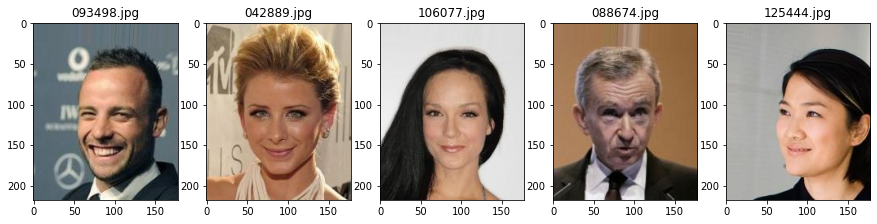

In [41]:
images_names = os.listdir('./celebA_train_500/celebA_imgs/')[:5]
show_imgs(images_names)

### Train Neural Network

Давайте создадим наборы данных и сеть, используя эти изображения:

In [52]:
transform_train = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_data = celebADataset('train', transform_train)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

# choose your own batch_size
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


**Рабочий процесс**: обучим модель на train_data, используя val_data для проверки. Используем стандартную функцию потерь CE. Рассчитаем потери и точность на тестовом наборе после обучения.

In [53]:
#!g1.1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [54]:
#!g1.1
!nvidia-smi
# import torch
torch.cuda.is_available()

Fri Jan 27 17:10:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.13    Driver Version: 525.60.13    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:02:00.0  On |                  N/A |
|  0%   36C    P8    23W / 220W |    379MiB /  8192MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [55]:
#!g1.1
# model = timm.create_model('efficientnet_b3a', pretrained=True)
model = timm.create_model('resnet50', pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [55]:
person = pd.read_csv('celebA_train_500/celebA_anno.txt', sep = ' ', names = ['file', 'label'])

In [56]:
n_classes = len(person['label'].unique())

In [58]:
#!g1.1
torch.cuda.empty_cache()
gc.collect()

8

Не ставлю задачей получения максимального скора, поэтому меняю модель на менее требовательную

In [59]:
#!g1.1
# classifier = model.classifier
# model.classifier = nn.Sequential(
#     nn.Linear(1536, 1000),
#     nn.BatchNorm1d(1000),
#     nn.Linear(1000, n_classes))
model.fc = nn.Sequential(
    nn.Linear(2048, 1000),
    nn.BatchNorm1d(1000),
    nn.Linear(1000, n_classes)
)
model.to(device)
print("we will classify :{}".format(n_classes))
print(model)

we will classify :500
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_run

In [60]:
#!g1.1
torch.cuda.empty_cache()
gc.collect()

19

In [61]:
#!g1.1
optimizer = Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [62]:
#!g1.1
model, history = train(
    train_data,
    val_data,
    model = model,
    epochs = 100,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = nn.CrossEntropyLoss()
)

epoch:   0%|                                            | 0/100 [00:00<?, ?it/s]/home/ssp/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


loss 4.52759589952476


epoch:   1%|▎                                 | 1/100 [01:10<1:55:42, 70.12s/it]


Epoch 001 train_loss: 4.5276     val_loss 2.8946 train_acc 0.1689 val_acc 0.3562
loss 1.4103039672758695


epoch:   2%|▋                                 | 2/100 [02:06<1:41:23, 62.07s/it]


Epoch 002 train_loss: 1.4103     val_loss 1.9082 train_acc 0.6774 val_acc 0.5687
loss 0.34679306638932855


epoch:   3%|█                                 | 3/100 [03:02<1:36:00, 59.39s/it]


Epoch 003 train_loss: 0.3468     val_loss 1.6439 train_acc 0.9272 val_acc 0.6305
loss 0.10405514453806346


epoch:   4%|█▎                                | 4/100 [03:59<1:33:07, 58.20s/it]


Epoch 004 train_loss: 0.1041     val_loss 1.4170 train_acc 0.9793 val_acc 0.6890
loss 0.05816329486863443


epoch:   5%|█▋                                | 5/100 [04:55<1:30:58, 57.46s/it]


Epoch 005 train_loss: 0.0582     val_loss 1.3771 train_acc 0.9905 val_acc 0.7045
loss 0.03268804574169023


epoch:   6%|██                                | 6/100 [05:51<1:29:21, 57.04s/it]


Epoch 006 train_loss: 0.0327     val_loss 1.3061 train_acc 0.9950 val_acc 0.7242
loss 0.0767734474755391


epoch:   7%|██▍                               | 7/100 [06:47<1:27:59, 56.77s/it]


Epoch 007 train_loss: 0.0768     val_loss 2.1929 train_acc 0.9826 val_acc 0.5570
loss 0.7486025374033924


epoch:   8%|██▋                               | 8/100 [07:43<1:26:45, 56.58s/it]


Epoch 008 train_loss: 0.7486     val_loss 2.8443 train_acc 0.8020 val_acc 0.5037
loss 0.46151382843039457


epoch:   9%|███                               | 9/100 [08:40<1:25:39, 56.48s/it]


Epoch 009 train_loss: 0.4615     val_loss 1.8023 train_acc 0.8736 val_acc 0.6576
loss 0.1238785005795459


epoch:  10%|███▎                             | 10/100 [09:38<1:25:25, 56.95s/it]


Epoch 010 train_loss: 0.1239     val_loss 1.4959 train_acc 0.9638 val_acc 0.7135
loss 0.038643962498065364


epoch:  11%|███▋                             | 11/100 [10:38<1:26:10, 58.10s/it]


Epoch 011 train_loss: 0.0386     val_loss 1.4020 train_acc 0.9897 val_acc 0.7348
loss 0.01957689498105149


epoch:  12%|███▉                             | 12/100 [11:35<1:24:23, 57.54s/it]


Epoch 012 train_loss: 0.0196     val_loss 1.3121 train_acc 0.9957 val_acc 0.7513
loss 0.0184564388571621


epoch:  13%|████▎                            | 13/100 [12:36<1:25:18, 58.83s/it]


Epoch 013 train_loss: 0.0185     val_loss 1.3013 train_acc 0.9966 val_acc 0.7503
loss 0.02923027679676448


epoch:  14%|████▌                            | 14/100 [13:39<1:25:57, 59.97s/it]


Epoch 014 train_loss: 0.0292     val_loss 1.5581 train_acc 0.9933 val_acc 0.7210
loss 0.13235668975738668


epoch:  15%|████▉                            | 15/100 [14:41<1:25:54, 60.64s/it]


Epoch 015 train_loss: 0.1324     val_loss 2.8521 train_acc 0.9644 val_acc 0.5245
loss 0.5231320324741052


epoch:  16%|█████▎                           | 16/100 [15:42<1:25:08, 60.81s/it]


Epoch 016 train_loss: 0.5231     val_loss 2.4947 train_acc 0.8642 val_acc 0.6219
loss 0.22784504475776624


epoch:  17%|█████▌                           | 17/100 [16:44<1:24:21, 60.99s/it]


Epoch 017 train_loss: 0.2278     val_loss 1.8186 train_acc 0.9342 val_acc 0.6960
loss 0.09321955697990741


epoch:  18%|█████▉                           | 18/100 [17:46<1:23:42, 61.25s/it]


Epoch 018 train_loss: 0.0932     val_loss 1.7413 train_acc 0.9739 val_acc 0.7077
loss 0.06061071678969925


epoch:  19%|██████▎                          | 19/100 [18:48<1:23:04, 61.54s/it]


Epoch 019 train_loss: 0.0606     val_loss 1.6524 train_acc 0.9803 val_acc 0.7215
loss 0.03804103944387722


epoch:  20%|██████▌                          | 20/100 [19:51<1:22:43, 62.05s/it]


Epoch 020 train_loss: 0.0380     val_loss 1.7342 train_acc 0.9895 val_acc 0.7306
loss 0.04817436584480776


epoch:  21%|██████▉                          | 21/100 [20:54<1:21:50, 62.16s/it]


Epoch 021 train_loss: 0.0482     val_loss 1.8666 train_acc 0.9838 val_acc 0.7023
loss 0.07478235447901381


epoch:  22%|███████▎                         | 22/100 [21:56<1:20:54, 62.24s/it]


Epoch 022 train_loss: 0.0748     val_loss 2.0101 train_acc 0.9788 val_acc 0.6933
loss 0.10656175903726564


epoch:  23%|███████▌                         | 23/100 [22:59<1:20:21, 62.61s/it]


Epoch 023 train_loss: 0.1066     val_loss 2.0815 train_acc 0.9714 val_acc 0.6880
loss 0.12271917792589121


epoch:  24%|███████▉                         | 24/100 [24:01<1:18:55, 62.31s/it]


Epoch 024 train_loss: 0.1227     val_loss 2.2666 train_acc 0.9651 val_acc 0.6645
loss 0.13763450538261693


epoch:  25%|████████▎                        | 25/100 [25:03<1:17:47, 62.23s/it]


Epoch 025 train_loss: 0.1376     val_loss 2.2501 train_acc 0.9601 val_acc 0.6731
loss 0.1268499572909601


epoch:  26%|████████▌                        | 26/100 [26:05<1:16:26, 61.99s/it]


Epoch 026 train_loss: 0.1268     val_loss 1.9682 train_acc 0.9629 val_acc 0.7125
loss 0.07815898363875252


epoch:  27%|████████▉                        | 27/100 [27:06<1:15:19, 61.91s/it]


Epoch 027 train_loss: 0.0782     val_loss 2.1352 train_acc 0.9779 val_acc 0.7125
loss 0.0593927356417549


epoch:  28%|█████████▏                       | 28/100 [28:12<1:15:43, 63.11s/it]


Epoch 028 train_loss: 0.0594     val_loss 1.7480 train_acc 0.9834 val_acc 0.7487
loss 0.052539132295405515


epoch:  29%|█████████▌                       | 29/100 [29:16<1:14:55, 63.31s/it]


Epoch 029 train_loss: 0.0525     val_loss 1.8150 train_acc 0.9847 val_acc 0.7412
loss 0.05863061931711527


epoch:  30%|█████████▉                       | 30/100 [30:21<1:14:27, 63.82s/it]


Epoch 030 train_loss: 0.0586     val_loss 1.8872 train_acc 0.9830 val_acc 0.7391
loss 0.09416791638825961


epoch:  31%|██████████▏                      | 31/100 [31:25<1:13:32, 63.95s/it]


Epoch 031 train_loss: 0.0942     val_loss 2.3393 train_acc 0.9745 val_acc 0.6741
loss 0.11842257924284612


epoch:  32%|██████████▌                      | 32/100 [32:31<1:13:13, 64.61s/it]


Epoch 032 train_loss: 0.1184     val_loss 2.2874 train_acc 0.9685 val_acc 0.6885
loss 0.10603298311357645


epoch:  33%|██████████▉                      | 33/100 [33:37<1:12:27, 64.89s/it]


Epoch 033 train_loss: 0.1060     val_loss 2.1452 train_acc 0.9717 val_acc 0.7050
loss 0.07504170077294482


epoch:  34%|███████████▏                     | 34/100 [34:43<1:11:40, 65.16s/it]


Epoch 034 train_loss: 0.0750     val_loss 2.0244 train_acc 0.9778 val_acc 0.7311
loss 0.04631546555719638


epoch:  35%|███████████▌                     | 35/100 [35:47<1:10:16, 64.87s/it]


Epoch 035 train_loss: 0.0463     val_loss 1.9353 train_acc 0.9874 val_acc 0.7354
loss 0.040386692852632806


epoch:  36%|███████████▉                     | 36/100 [36:52<1:09:10, 64.84s/it]


Epoch 036 train_loss: 0.0404     val_loss 1.9469 train_acc 0.9897 val_acc 0.7396
loss 0.06237287928548822


epoch:  37%|████████████▏                    | 37/100 [37:56<1:07:52, 64.65s/it]


Epoch 037 train_loss: 0.0624     val_loss 2.0232 train_acc 0.9830 val_acc 0.7354
loss 0.075832462192866


epoch:  38%|████████████▌                    | 38/100 [39:01<1:06:52, 64.72s/it]


Epoch 038 train_loss: 0.0758     val_loss 2.3576 train_acc 0.9803 val_acc 0.6954
loss 0.08524586411424318


epoch:  39%|████████████▊                    | 39/100 [40:05<1:05:42, 64.63s/it]


Epoch 039 train_loss: 0.0852     val_loss 2.0982 train_acc 0.9772 val_acc 0.7311
loss 0.055985605862499704


epoch:  40%|█████████████▏                   | 40/100 [41:10<1:04:48, 64.80s/it]


Epoch 040 train_loss: 0.0560     val_loss 2.2155 train_acc 0.9831 val_acc 0.7231
loss 0.07314778146440161


epoch:  41%|█████████████▌                   | 41/100 [42:14<1:03:30, 64.59s/it]


Epoch 041 train_loss: 0.0731     val_loss 2.2777 train_acc 0.9788 val_acc 0.7220
loss 0.059653662467432735


epoch:  42%|█████████████▊                   | 42/100 [43:20<1:02:37, 64.79s/it]


Epoch 042 train_loss: 0.0597     val_loss 2.1628 train_acc 0.9835 val_acc 0.7226
loss 0.052973899481037236


epoch:  43%|██████████████▏                  | 43/100 [44:25<1:01:36, 64.86s/it]


Epoch 043 train_loss: 0.0530     val_loss 2.1360 train_acc 0.9865 val_acc 0.7391
loss 0.06993977177476342


epoch:  44%|██████████████▌                  | 44/100 [45:30<1:00:39, 65.00s/it]


Epoch 044 train_loss: 0.0699     val_loss 2.1088 train_acc 0.9793 val_acc 0.7306
loss 0.04962354010197654


epoch:  45%|███████████████▊                   | 45/100 [46:35<59:31, 64.94s/it]


Epoch 045 train_loss: 0.0496     val_loss 2.1432 train_acc 0.9870 val_acc 0.7343
loss 0.05792337225807472


epoch:  46%|████████████████                   | 46/100 [47:40<58:23, 64.89s/it]


Epoch 046 train_loss: 0.0579     val_loss 2.1114 train_acc 0.9864 val_acc 0.7380
loss 0.05986552308480596


epoch:  47%|████████████████▍                  | 47/100 [48:45<57:19, 64.91s/it]


Epoch 047 train_loss: 0.0599     val_loss 1.9836 train_acc 0.9876 val_acc 0.7604
loss 0.049535278289951155


epoch:  48%|████████████████▊                  | 48/100 [49:47<55:32, 64.09s/it]


Epoch 048 train_loss: 0.0495     val_loss 2.1893 train_acc 0.9867 val_acc 0.7561
loss 0.042120380822582563


epoch:  49%|█████████████████▏                 | 49/100 [50:49<53:56, 63.45s/it]


Epoch 049 train_loss: 0.0421     val_loss 2.1036 train_acc 0.9878 val_acc 0.7465
loss 0.04711929722463694


epoch:  50%|█████████████████▌                 | 50/100 [51:51<52:30, 63.00s/it]


Epoch 050 train_loss: 0.0471     val_loss 2.0850 train_acc 0.9877 val_acc 0.7348
loss 0.05653838108520766


epoch:  51%|█████████████████▊                 | 51/100 [52:52<51:06, 62.57s/it]


Epoch 051 train_loss: 0.0565     val_loss 2.4561 train_acc 0.9855 val_acc 0.7215
loss 0.07895882493319098


epoch:  52%|██████████████████▏                | 52/100 [53:55<50:03, 62.58s/it]


Epoch 052 train_loss: 0.0790     val_loss 2.3168 train_acc 0.9800 val_acc 0.7157
loss 0.05923602205262108


epoch:  53%|██████████████████▌                | 53/100 [54:57<48:49, 62.33s/it]


Epoch 053 train_loss: 0.0592     val_loss 2.0097 train_acc 0.9831 val_acc 0.7487
loss 0.04142771080018412


epoch:  54%|██████████████████▉                | 54/100 [55:58<47:38, 62.14s/it]


Epoch 054 train_loss: 0.0414     val_loss 1.8489 train_acc 0.9870 val_acc 0.7827
loss 0.03668052832101021


epoch:  55%|███████████████████▎               | 55/100 [56:59<46:23, 61.86s/it]


Epoch 055 train_loss: 0.0367     val_loss 2.0427 train_acc 0.9895 val_acc 0.7529
loss 0.055642686587448684


epoch:  56%|███████████████████▌               | 56/100 [58:02<45:26, 61.96s/it]


Epoch 056 train_loss: 0.0556     val_loss 2.2601 train_acc 0.9844 val_acc 0.7370
loss 0.04435607550399578


epoch:  57%|███████████████████▉               | 57/100 [59:03<44:22, 61.91s/it]


Epoch 057 train_loss: 0.0444     val_loss 2.1825 train_acc 0.9862 val_acc 0.7545
loss 0.051159587564330214


epoch:  58%|███████████████████▏             | 58/100 [1:00:05<43:18, 61.87s/it]


Epoch 058 train_loss: 0.0512     val_loss 2.0879 train_acc 0.9863 val_acc 0.7513
loss 0.027381336926950172


epoch:  59%|███████████████████▍             | 59/100 [1:01:07<42:14, 61.83s/it]


Epoch 059 train_loss: 0.0274     val_loss 2.0862 train_acc 0.9898 val_acc 0.7599
loss 0.049502757262721575


epoch:  60%|███████████████████▊             | 60/100 [1:02:08<41:02, 61.57s/it]


Epoch 060 train_loss: 0.0495     val_loss 2.3722 train_acc 0.9872 val_acc 0.7359
loss 0.03875027673761872


epoch:  61%|████████████████████▏            | 61/100 [1:03:09<39:59, 61.53s/it]


Epoch 061 train_loss: 0.0388     val_loss 2.0520 train_acc 0.9901 val_acc 0.7513
loss 0.03950376220867785


epoch:  62%|████████████████████▍            | 62/100 [1:04:08<38:22, 60.58s/it]


Epoch 062 train_loss: 0.0395     val_loss 2.1179 train_acc 0.9899 val_acc 0.7577
loss 0.04488403740047902


epoch:  63%|████████████████████▊            | 63/100 [1:05:10<37:38, 61.04s/it]


Epoch 063 train_loss: 0.0449     val_loss 1.9438 train_acc 0.9878 val_acc 0.7710
loss 0.0405237796476873


epoch:  64%|█████████████████████            | 64/100 [1:06:13<36:58, 61.62s/it]


Epoch 064 train_loss: 0.0405     val_loss 2.1352 train_acc 0.9897 val_acc 0.7465
loss 0.036352881349452124


epoch:  65%|█████████████████████▍           | 65/100 [1:07:16<36:08, 61.95s/it]


Epoch 065 train_loss: 0.0364     val_loss 2.0070 train_acc 0.9905 val_acc 0.7732
loss 0.029235224742338025


epoch:  66%|█████████████████████▊           | 66/100 [1:08:17<35:03, 61.88s/it]


Epoch 066 train_loss: 0.0292     val_loss 2.2996 train_acc 0.9909 val_acc 0.7508
loss 0.03959913421424866


epoch:  67%|██████████████████████           | 67/100 [1:09:19<33:57, 61.74s/it]


Epoch 067 train_loss: 0.0396     val_loss 2.1641 train_acc 0.9897 val_acc 0.7556
loss 0.05450087739679274


epoch:  68%|██████████████████████▍          | 68/100 [1:10:20<32:51, 61.60s/it]


Epoch 068 train_loss: 0.0545     val_loss 2.3187 train_acc 0.9863 val_acc 0.7444
loss 0.04641832108194655


epoch:  69%|██████████████████████▊          | 69/100 [1:11:21<31:42, 61.38s/it]


Epoch 069 train_loss: 0.0464     val_loss 2.2357 train_acc 0.9875 val_acc 0.7455
loss 0.04248425153200736


epoch:  70%|███████████████████████          | 70/100 [1:12:21<30:29, 60.98s/it]


Epoch 070 train_loss: 0.0425     val_loss 2.0797 train_acc 0.9904 val_acc 0.7545
loss 0.040366416888177006


epoch:  71%|███████████████████████▍         | 71/100 [1:13:22<29:29, 61.00s/it]


Epoch 071 train_loss: 0.0404     val_loss 2.2170 train_acc 0.9878 val_acc 0.7599
loss 0.04555364231715031


epoch:  72%|███████████████████████▊         | 72/100 [1:14:24<28:35, 61.27s/it]


Epoch 072 train_loss: 0.0456     val_loss 2.3392 train_acc 0.9876 val_acc 0.7476
loss 0.024464324352047543


epoch:  73%|████████████████████████         | 73/100 [1:15:26<27:39, 61.47s/it]


Epoch 073 train_loss: 0.0245     val_loss 2.2044 train_acc 0.9929 val_acc 0.7630
loss 0.0333268679321523


epoch:  74%|████████████████████████▍        | 74/100 [1:16:27<26:39, 61.53s/it]


Epoch 074 train_loss: 0.0333     val_loss 2.4029 train_acc 0.9920 val_acc 0.7535
loss 0.03600845770627407


epoch:  75%|████████████████████████▊        | 75/100 [1:17:29<25:39, 61.59s/it]


Epoch 075 train_loss: 0.0360     val_loss 2.3499 train_acc 0.9905 val_acc 0.7455
loss 0.04407413867110155


epoch:  76%|█████████████████████████        | 76/100 [1:18:31<24:38, 61.61s/it]


Epoch 076 train_loss: 0.0441     val_loss 2.2036 train_acc 0.9896 val_acc 0.7519
loss 0.05583051826450306


epoch:  77%|█████████████████████████▍       | 77/100 [1:19:32<23:36, 61.60s/it]


Epoch 077 train_loss: 0.0558     val_loss 2.1162 train_acc 0.9848 val_acc 0.7625
loss 0.05957412801764007


epoch:  78%|█████████████████████████▋       | 78/100 [1:20:34<22:32, 61.49s/it]


Epoch 078 train_loss: 0.0596     val_loss 2.1975 train_acc 0.9856 val_acc 0.7545
loss 0.026740727842975452


epoch:  79%|██████████████████████████       | 79/100 [1:21:36<21:33, 61.61s/it]


Epoch 079 train_loss: 0.0267     val_loss 1.9550 train_acc 0.9911 val_acc 0.7817
loss 0.021723103227181104


epoch:  80%|██████████████████████████▍      | 80/100 [1:22:36<20:28, 61.41s/it]


Epoch 080 train_loss: 0.0217     val_loss 1.9761 train_acc 0.9943 val_acc 0.7764
loss 0.02819617153485604


epoch:  81%|██████████████████████████▋      | 81/100 [1:23:38<19:29, 61.56s/it]


Epoch 081 train_loss: 0.0282     val_loss 2.1778 train_acc 0.9920 val_acc 0.7710
loss 0.022125346579764366


epoch:  82%|███████████████████████████      | 82/100 [1:24:41<18:32, 61.81s/it]


Epoch 082 train_loss: 0.0221     val_loss 2.0717 train_acc 0.9943 val_acc 0.7641
loss 0.02149690227989733


epoch:  83%|███████████████████████████▍     | 83/100 [1:25:42<17:26, 61.55s/it]


Epoch 083 train_loss: 0.0215     val_loss 2.2500 train_acc 0.9943 val_acc 0.7583
loss 0.036078891044622724


epoch:  84%|███████████████████████████▋     | 84/100 [1:26:43<16:22, 61.41s/it]


Epoch 084 train_loss: 0.0361     val_loss 2.3119 train_acc 0.9905 val_acc 0.7529
loss 0.04845851966382561


epoch:  85%|████████████████████████████     | 85/100 [1:27:41<15:05, 60.39s/it]


Epoch 085 train_loss: 0.0485     val_loss 2.4643 train_acc 0.9877 val_acc 0.7242
loss 0.04304951889018875


epoch:  86%|████████████████████████████▍    | 86/100 [1:28:38<13:54, 59.58s/it]


Epoch 086 train_loss: 0.0430     val_loss 2.0887 train_acc 0.9888 val_acc 0.7758
loss 0.024772785701752356


epoch:  87%|████████████████████████████▋    | 87/100 [1:29:36<12:47, 59.02s/it]


Epoch 087 train_loss: 0.0248     val_loss 2.0372 train_acc 0.9926 val_acc 0.7796
loss 0.024878183272979915


epoch:  88%|█████████████████████████████    | 88/100 [1:30:34<11:43, 58.61s/it]


Epoch 088 train_loss: 0.0249     val_loss 1.9765 train_acc 0.9937 val_acc 0.7822
loss 0.02925560576936453


epoch:  89%|█████████████████████████████▎   | 89/100 [1:31:32<10:43, 58.49s/it]


Epoch 089 train_loss: 0.0293     val_loss 2.3083 train_acc 0.9931 val_acc 0.7572
loss 0.02731523585374474


epoch:  90%|█████████████████████████████▋   | 90/100 [1:32:30<09:43, 58.32s/it]


Epoch 090 train_loss: 0.0273     val_loss 1.9807 train_acc 0.9937 val_acc 0.7742
loss 0.022971897552225576


epoch:  91%|██████████████████████████████   | 91/100 [1:33:31<08:51, 59.10s/it]


Epoch 091 train_loss: 0.0230     val_loss 2.2202 train_acc 0.9943 val_acc 0.7652
loss 0.030365816273892676


epoch:  92%|██████████████████████████████▎  | 92/100 [1:34:34<08:02, 60.37s/it]


Epoch 092 train_loss: 0.0304     val_loss 2.1338 train_acc 0.9931 val_acc 0.7694
loss 0.03525120584658345


epoch:  93%|██████████████████████████████▋  | 93/100 [1:35:37<07:08, 61.18s/it]


Epoch 093 train_loss: 0.0353     val_loss 2.1897 train_acc 0.9903 val_acc 0.7774
loss 0.03273480604463422


epoch:  94%|███████████████████████████████  | 94/100 [1:36:41<06:10, 61.80s/it]


Epoch 094 train_loss: 0.0327     val_loss 2.3094 train_acc 0.9915 val_acc 0.7588
loss 0.06627347387517618


epoch:  95%|███████████████████████████████▎ | 95/100 [1:37:44<05:11, 62.25s/it]


Epoch 095 train_loss: 0.0663     val_loss 2.5722 train_acc 0.9867 val_acc 0.7332
loss 0.039557965492785056


epoch:  96%|███████████████████████████████▋ | 96/100 [1:38:47<04:10, 62.52s/it]


Epoch 096 train_loss: 0.0396     val_loss 2.2429 train_acc 0.9889 val_acc 0.7684
loss 0.025987005987134493


epoch:  97%|████████████████████████████████ | 97/100 [1:39:49<03:07, 62.47s/it]


Epoch 097 train_loss: 0.0260     val_loss 2.0279 train_acc 0.9927 val_acc 0.7806
loss 0.029740425056171475


epoch:  98%|████████████████████████████████▎| 98/100 [1:40:52<02:05, 62.58s/it]


Epoch 098 train_loss: 0.0297     val_loss 2.0522 train_acc 0.9922 val_acc 0.7769
loss 0.026659861445353455


epoch:  99%|████████████████████████████████▋| 99/100 [1:41:55<01:02, 62.74s/it]


Epoch 099 train_loss: 0.0267     val_loss 2.1231 train_acc 0.9932 val_acc 0.7812
loss 0.023922546560500028


epoch: 100%|████████████████████████████████| 100/100 [1:42:54<00:00, 61.75s/it]


Epoch 100 train_loss: 0.0239     val_loss 1.8994 train_acc 0.9943 val_acc 0.7977
Best val Acc: 0.797657


In [63]:
#!g1.1
torch.save(model.state_dict(), 'model_CE_100.pth')

In [64]:
#!g1.1
model.to(device)
model.load_state_dict(torch.load('model_CE_100.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [65]:
epoch, loss, acc, val_loss, val_acc = zip(*history)

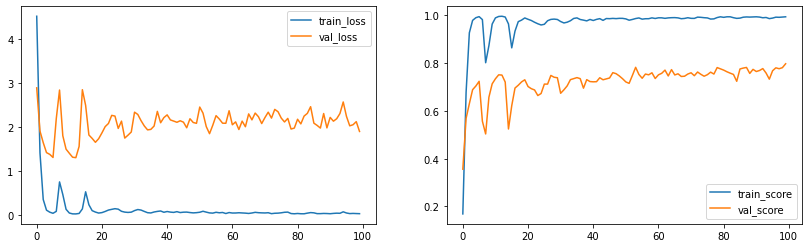

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

На efficientnet_b3a с размером картинок 300х300, размером батча 64 и 50 эпохами вытягивала на 0,8684707, но не суть, важна чистота эксперимента...:)

Код для оценки модели (вы можете изменить его, если хотите):

In [67]:
#!g1.1
test_accuracy, test_loss = evaluate(model, test_loader, nn.CrossEntropyLoss())
test_accuracy, test_loss

Test images: 50it [00:05,  9.07it/s]


(array(0.78791696, dtype=float32), 2.045302382707596)

**Cosine similarity calculation**: drop the last layer of trained network. Get embeddings for some images from train set and for images from test set. Calculate cosine similarities between embeddings corresponding to the pictures of the same person and different people. Is the difference big in any of cases?

**Вычисление косинусного сходства**: удалим последний слой обученной сети. Получим эмбеддинги для некоторых изображений из train и для изображений из test. Вычислим косинусное сходство между эмбеддингами, соответствующими изображениям одного и того же человека и разных людей.

Отбросим у нашей сетки последний слой

In [69]:
# classifier = model.classifier
# # model.classifier = nn.Sequential(
# #     nn.Linear(1536, 1000),
# #     nn.BatchNorm1d(1000))
# model.classifier = nn.Linear(1536, 1000)
model.fc = nn.Sequential(
    nn.Linear(2048, 1000),
    nn.BatchNorm1d(1000)
)
model.to(device)
print("we will classify :{}".format(n_classes))
print(model)

we will classify :500
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_run

In [70]:
torch.cuda.empty_cache()
gc.collect()

14

Сделаем себе словарик с метками и именами файлов картинок

In [71]:
test_class_idx_map = defaultdict(list)
for i, batch in enumerate(test_data):
    X_batch, y_batch = batch['image'], batch['label']
    test_class_idx_map[y_batch].append(i)
    
train_class_idx_map = defaultdict(list)
for i, batch in enumerate(train_data):
    X_batch, y_batch = batch['image'], batch['label']
    train_class_idx_map[y_batch].append(i)

Посчитаем влет косинусные расстояния для фото одного человека и разных людей

In [72]:
test_embs = 0
train_embs = 0
train_embs_cache = {}
same_persons = torch.FloatTensor([0])
diff_persons = torch.FloatTensor([0])

for test_cl, test_idxs in tqdm(test_class_idx_map.items(), desc='Test images'):

    imgs = torch.vstack([test_data[i]['image'][None, :] for i in test_idxs])
#     print('Запрос эмбеддингов теста от:', imgs.shape, 'по классу:', test_cl)
    test_embs = get_embeddings(model, imgs)
        
    for train_cl, train_idxs in tqdm(train_class_idx_map.items(), desc='Train images', leave=False):

        if train_cl in train_embs_cache:
            train_embs = train_embs_cache[train_cl]
        else:
            imgs = torch.vstack([train_data[i]['image'][None, :] for i in train_idxs])
#             print('Запрос эмбеддингов трейна от:', imgs.shape, 'по классу:', train_cl)
            train_embs = get_embeddings(model, imgs)
            train_embs_cache[train_cl] = train_embs
        
        pcs = pairwise_cosine_similarity(test_embs, train_embs).flatten()
        if train_cl == test_cl:
            same_persons = torch.hstack((same_persons, pcs))
        else:
            diff_persons = torch.hstack((diff_persons, pcs))

Train images:  40%|██████████▋                | 199/500 [00:45<01:07,  4.44it/s]


Train images:  81%|█████████████████████▊     | 405/500 [01:30<00:21,  4.40it/s]


Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

In [73]:
with open('same_persons', 'wb') as f:
    pickle.dump(same_persons, f)
with open('diff_persons', 'wb') as f:
    pickle.dump(diff_persons, f)

In [74]:
with open('same_persons', 'rb') as f:
    same_persons = pickle.load(f)
with open('diff_persons', 'rb') as f:
    diff_persons = pickle.load(f)

In [75]:
same_persons

tensor([0.0000, 0.7171, 0.6607, 0.4862, 0.5446, 0.6822, 0.6635, 0.7867, 0.6945,
        0.6512, 0.7434, 0.6730, 0.6530, 0.6083, 0.5280, 0.6933, 0.7915, 0.5327,
        0.7096, 0.7327, 0.5495, 0.6038, 0.5849, 0.5906, 0.7940, 0.5611, 0.5434,
        0.5668, 0.7195, 0.6081, 0.6684, 0.6934, 0.7479, 0.6599, 0.6708, 0.6954,
        0.5438, 0.8541, 0.5843, 0.7224, 0.6671, 0.7289, 0.7363, 0.6261, 0.5636,
        0.6447, 0.8147, 0.4649, 0.6609, 0.8736, 0.6642, 0.7264, 0.5687, 0.7060,
        0.5160, 0.5579, 0.6882, 0.6668, 0.6816, 0.5895, 0.7341, 0.7300, 0.6115,
        0.6961, 0.6172, 0.6294, 0.7306, 0.6490, 0.6794, 0.6034, 0.7107, 0.7834,
        0.5209, 0.6890, 0.6933, 0.5767, 0.4731, 0.7397, 0.6573, 0.8445, 0.8331,
        0.5984, 0.7472, 0.8431, 0.6349, 0.6312, 0.7535, 0.4729, 0.7762, 0.7177,
        0.5893, 0.7886, 0.6289, 0.6728, 0.6171, 0.5831, 0.6740, 0.7646, 0.7007,
        0.7081, 0.6502, 0.7079, 0.5314, 0.7984, 0.7140, 0.6369, 0.7120, 0.6141,
        0.6742, 0.6841, 0.4690, 0.6450, 

In [76]:
diff_persons

tensor([0.0000, 0.5336, 0.4873,  ..., 0.6089, 0.5760, 0.5008])

In [77]:
same_persons = same_persons[1:]
diff_persons = diff_persons[1:]

In [78]:
same_persons

tensor([0.7171, 0.6607, 0.4862, 0.5446, 0.6822, 0.6635, 0.7867, 0.6945, 0.6512,
        0.7434, 0.6730, 0.6530, 0.6083, 0.5280, 0.6933, 0.7915, 0.5327, 0.7096,
        0.7327, 0.5495, 0.6038, 0.5849, 0.5906, 0.7940, 0.5611, 0.5434, 0.5668,
        0.7195, 0.6081, 0.6684, 0.6934, 0.7479, 0.6599, 0.6708, 0.6954, 0.5438,
        0.8541, 0.5843, 0.7224, 0.6671, 0.7289, 0.7363, 0.6261, 0.5636, 0.6447,
        0.8147, 0.4649, 0.6609, 0.8736, 0.6642, 0.7264, 0.5687, 0.7060, 0.5160,
        0.5579, 0.6882, 0.6668, 0.6816, 0.5895, 0.7341, 0.7300, 0.6115, 0.6961,
        0.6172, 0.6294, 0.7306, 0.6490, 0.6794, 0.6034, 0.7107, 0.7834, 0.5209,
        0.6890, 0.6933, 0.5767, 0.4731, 0.7397, 0.6573, 0.8445, 0.8331, 0.5984,
        0.7472, 0.8431, 0.6349, 0.6312, 0.7535, 0.4729, 0.7762, 0.7177, 0.5893,
        0.7886, 0.6289, 0.6728, 0.6171, 0.5831, 0.6740, 0.7646, 0.7007, 0.7081,
        0.6502, 0.7079, 0.5314, 0.7984, 0.7140, 0.6369, 0.7120, 0.6141, 0.6742,
        0.6841, 0.4690, 0.6450, 0.6517, 

In [79]:
np.array(same_persons).mean()

0.6666403

С фото одинаковйх людей косинусное подобие в среднем 0.6666403

In [80]:
diff_persons

tensor([0.5336, 0.4873, 0.6443,  ..., 0.6089, 0.5760, 0.5008])

In [81]:
np.array(diff_persons).mean()

0.5419446

С фотографиями разных людей оно в среднем 0.5419446

**Cosine similarity distribution**: рассчитаем все косинусные сходства между изображениями в test dataset и train dataset одного и того же человека. Это означает, что если у нас есть изображение человека #106 из test dataset, необходимо рассчитать все сходства между эмбеддингами этого человека из test dataset и эмбеддингами этого человека из train dataset. 

Затем также сделаем это для пар разных людей. Это означает, что если у вас есть изображение человека #106 из test dataset, необходимо рассчитать все сходства между эмбеддингами этого человека из test dataset и эмбеддингами отличного от него человека из train dataset.

Визуализируем (построим гистограммы) распределения косинусного сходства для одних и тех же и разных людей.

Этот расчет может занять много времени и памяти, так как это много пар. Мы сократим количество пар, между которыми рассчитаем расстояния до 1000.

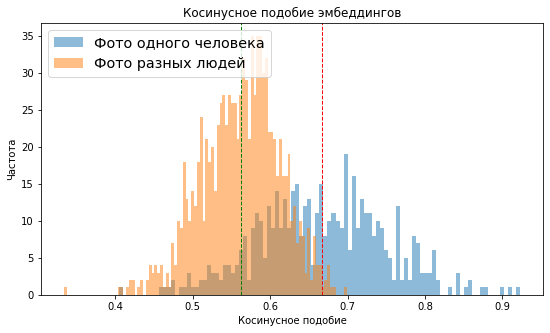

In [83]:
plt.figure (figsize = [9, 5])
    
plt.hist (np.array(same_persons)[:1000], bins=100, label = 'Фото одного человека', alpha=.5)
plt.hist (np.array(diff_persons)[:1000], bins=100, label = 'Фото разных людей', alpha=.5)

# plt.xlim ([0, 1])
# plt.ylim ([0, 9000])
plt.axvline(np.array(same_persons)[:1000].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(np.array(diff_persons)[:1000].mean(), color='g', linestyle='dashed', linewidth=1)


plt.xlabel ('Косинусное подобие')
plt.ylabel ('Частота')

plt.legend (loc = 'upper left', fontsize = 'x-large')

plt.title ('Косинусное подобие эмбеддингов')
plt.show ()

На гистограммах видим, что распределения косинусного подобия фотографий для одного человека и для нескольких близки к нормальным. Отмечается среднее по распределению у разных людей ближе к 0.5419446, а у одного человека к 0.6666403

## Часть 2: Identificaton rate metric

При обучении приведенной выше модели мы использовали потери CE на val and test датасетах в качестве меры производительности нашей модели. Но у этого есть большой недостаток: мы не можем измерить, как модель будет работать на невидимых лицах (которые не присутствовали в train, val и test датасетах)

Чтобы решить эту проблему, мы можем рассчитать другую метрику для модели: **identification rate**. Вот как это работает:

У нас есть два датасета с лицами: query and distractors. Ни одно из них не было в train, val или test датасетах.

1. расчитаем cosine similarities между всеми лицами соответствующим одному человеку из query dataset. Это означает, что если у нас есть 3 фото из query части: 01.jpg, 02.jpg, 03.jpg, мы расчитаем 3 cosine similarities между всеми эмбеддингами этих фото. 
2. расчитаем cosine similarities между всеми эмбеддингами разных людей из query dataset. 
3. расчитаем cosine similarities между всеми парами эмбеддингов, соответствующих query and distractors. Это означает, что нам необходимо посчитать подобия между (q, d), где q это эмбеддинг из query, d — эмбеддинг из distractors. Нам надо |query|*|distractors| подобие.
4. Просуммировать число подобий из 2 и 3 пунктов. Это будет числом false pairs.
5. посчитаем **FPR** (false positive rate). Пусть будет равен 0.01 в нашем случае. FPR, умноженный на количество false pairs из пункта 4 это число - false positives, которое мы позволяем нашей модели для ложных срабатываний. Назовем это числом N
6. Отсортируем все подобия из false pairs по возрастанию. Вохьмем N-ый элемент с начала — это наш **threshold similarity**.
7. Посчитаем сколько положитедбных срабатываний из пункта 1 превышает threshold. Разделим это число на число положительных подобиц из пункта 1. Это - TPR (true positive rate) — наша метрика.

Этот показатель также может быть выражен как TPR@FPR=0.01. FPR может быть установлен разным. 

Данные (query photos, query labels & distructors photos) можно загрузить отсюда:

In [84]:
# ! curl -L $(yadisk-direct https://disk.yandex.com/d/KN4EEkNKrF_ZXQ) -o celebA_ir.zip
# ! unzip -qq celebA_ir.zip

**Пример**: внедрим метрику TPR@FPR. Посчтитаем ее для нашей модели на test датасете при FPR=[0.5, 0.2, 0.1, 0.05].

In [85]:
# file with query part annotations: which image belongs to which class
# format: 
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.csv', 'r')
query_lines = f.readlines()[1:]
f.close()
query_lines = [x.strip().split(',') for x in query_lines]
# plain list of image names from query. Neede to compute embeddings for query
query_img_names = [x[0] for x in query_lines]

# dictionary with info of which images from query belong to which class
# format:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
    query_dict[img_class].append(img_name)

# list of distractor images
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors') 

In [86]:
# train_dict, train_img_names = type_embeddings('train')
# with open('train_dict.pkl', 'wb') as f:
#     pickle.dump(train_dict, f)
# with open("train_img_names", 'wb') as f:   #Pickling
#     pickle.dump(train_img_names, f)

# val_dict, val_img_names = type_embeddings('val')
# with open('val_dict.pkl', 'wb') as f:
#     pickle.dump(val_dict, f)
# with open("val_img_names", 'wb') as f:   #Pickling
#     pickle.dump(val_img_names, f)
    
test_dict, test_img_names = type_embeddings('test')

In [87]:
with open('test_dict.pkl', 'wb') as f:
    pickle.dump(test_dict, f)
with open("test_img_names", 'wb') as f:   #Pickling
    pickle.dump(test_img_names, f)

In [88]:
# with open('train_dict.pkl', 'rb') as f:
#     train_dict = pickle.load(f)
# with open('train_img_names', 'rb') as f:
#     train_img_names = pickle.load(f)
    
# with open('val_dict.pkl', 'rb') as f:
#     val_dict = pickle.load(f)
# with open('val_img_names', 'rb') as f:
#     val_img_names = pickle.load(f)
    
with open('test_dict.pkl', 'rb') as f:
    test_dict = pickle.load(f)
with open('test_img_names', 'rb') as f:
    test_img_names = pickle.load(f)

In [89]:
torch.cuda.empty_cache()
gc.collect()

14984

In [90]:
path = './celebA_train_500/celebA_imgs/'
# # test_embeddings = compute_embeddings_test(model, test_img_names[:5])
test_embeddings = compute_embeddings(model, test_img_names, path)
with open("test_embeddings", 'wb') as f:   #Pickling
    pickle.dump(test_embeddings, f)
    
# torch.cuda.empty_cache()
# gc.collect()

# val_embeddings = compute_embeddings(model, val_img_names, path)
# with open("val_embeddings", 'wb') as f:   #Pickling
#     pickle.dump(val_embeddings, f)
    
# torch.cuda.empty_cache()
# gc.collect()

# train_embeddings = compute_embeddings(model, train_img_names, path)
# with open("train_embeddings", 'wb') as f:   #Pickling
#     pickle.dump(train_embeddings, f)

Get embeddings: 50it [00:02, 18.50it/s]


In [91]:
torch.cuda.empty_cache()
gc.collect()

0

In [92]:
with open('test_embeddings', 'rb') as f:
    test_embeddings = pickle.load(f)
# with open('val_embeddings', 'rb') as f:
#     val_embeddings = pickle.load(f)
# with open('train_embeddings', 'rb') as f:
#     train_embeddings = pickle.load(f)

In [93]:
path = './celebA_ir/celebA_query/'
query_embeddings = compute_embeddings(model, query_img_names, path)

torch.cuda.empty_cache()
gc.collect()

path = './celebA_ir/celebA_distractors/'
distractors_embeddings = compute_embeddings(model, distractors_img_names, path)

torch.cuda.empty_cache()
gc.collect()

Get embeddings: 39it [00:02, 18.97it/s]
Get embeddings: 63it [00:03, 19.62it/s]


0

In [94]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, 
                                            query_embeddings)
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, 
                                            query_embeddings)
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, 
                                                            distractors_embeddings)


distractors_embeddings:  19%|██▋           | 377/2001 [00:00<00:00, 3769.19it/s]


distractors_embeddings:  44%|██████▏       | 880/2001 [00:00<00:00, 2948.22it/s]


query_embeddings:   7%|█▌                     | 82/1222 [00:46<10:36,  1.79it/s]


distractors_embeddings:  55%|███████▏     | 1098/2001 [00:00<00:00, 3666.21it/s]


distractors_embeddings:  36%|█████         | 729/2001 [00:00<00:00, 3600.42it/s]


distractors_embeddings:  17%|██▎           | 332/2001 [00:00<00:00, 3319.01it/s]


distractors_embeddings:  83%|██████████▊  | 1660/2001 [00:00<00:00, 2787.06it/s]


distractors_embeddings:  14%|█▉            | 276/2001 [00:00<00:00, 2758.19it/s]


distractors_embeddings:  18%|██▌           | 370/2001 [00:00<00:00, 3692.78it/s]


query_embeddings:  22%|████▊                 | 267/1222 [02:39<08:44,  1.82it/s]


distractors_embeddings:  54%|███████      | 1088/2001 [00:00<00:00, 3565.05it/s]


distractors_embeddings:  19%|██▌           | 372/2001 [00:00<00:00, 3715.57it/s]


query_embeddings:  29%|██████▎               | 350/1222 [03:26<08:01,  1.81it/s]


distractors_embeddings:  74%|█████████▋   | 1484/2001 [00:00<00:00, 3667.45it/s]


distractors_embeddings:  38%|█████▎        | 756/2001 [00:00<00:00, 3715.21it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  90%|███████████▋ | 1807/2001 [00:00<00:00, 2991.80it/s]


distractors_embeddings:  53%|██████▊      | 1054/2001 [00:00<00:00, 3501.75it/s]


distractors_embeddings:  37%|█████▏        | 742/2001 [00:00<00:00, 3551.87it/s]


distractors_embeddings:  69%|████████▉    | 1385/2001 [00:00<00:00, 3471.35it/s]


distractors_embeddings:  83%|██████████▊  | 1668/2001 [00:00<00:00, 2804.32it/s]


distractors_embeddings:  86%|███████████▏ | 1715/2001 [00:00<00:00, 3441.85it/s]


distractors_embeddings:  18%|██▌           | 360/2001 [00:00<00:00, 3594.13it/s]


distractors_embeddings:  18%|██▍           | 357/2001 [00:00<00:00, 3560.49it/s]


query_embeddings:  55%|████████████          | 670/1222 [06:39<05:29,  1.67it/s]


distractors_embeddings:  85%|███████████  | 1699/2001 [00:00<00:00, 2824.75it/s]


distractors_embeddings:  71%|█████████▏   | 1414/2001 [00:00<00:00, 3515.09it/s]


distractors_embeddings:  41%|█████▋        | 820/2001 [00:00<00:00, 2629.23it/s]


distractors_embeddings:  54%|███████      | 1080/2001 [00:00<00:00, 3529.62it/s]


distractors_embeddings:  13%|█▊            | 257/2001 [00:00<00:00, 2569.71it/s]


distractors_embeddings:  54%|███████      | 1085/2001 [00:00<00:00, 3501.53it/s]


distractors_embeddings:  72%|█████████▎   | 1437/2001 [00:00<00:00, 3487.19it/s]


distractors_embeddings:  18%|██▍           | 352/2001 [00:00<00:00, 3512.78it/s]


distractors_embeddings:  75%|█████████▋   | 1493/2001 [00:00<00:00, 3165.26it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  36%|█████         | 724/2001 [00:00<00:00, 3527.13it/s]


distractors_embeddings:  90%|███████████▊ | 1809/2001 [00:00<00:00, 3180.16it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  14%|█▉            | 277/2001 [00:00<00:00, 2764.05it/s]


query_embeddings:  87%|██████████████████▎  | 1063/1222 [10:47<01:34,  1.68it/s]


distractors_embeddings:  18%|██▌           | 360/2001 [00:00<00:00, 3595.95it/s]


distractors_embeddings:  73%|█████████▍   | 1452/2001 [00:00<00:00, 3399.85it/s]


distractors_embeddings:  74%|█████████▋   | 1487/2001 [00:00<00:00, 3625.26it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


query_embeddings:  98%|████████████████████▌| 1197/1222 [12:07<00:15,  1.58it/s]


query_embeddings: 100%|█████████████████████| 1222/1222 [12:23<00:00,  1.64it/s]


In [95]:
with open("cosine_query_pos", 'wb') as f:
    pickle.dump(cosine_query_pos, f)
with open("cosine_query_neg", 'wb') as f:
    pickle.dump(cosine_query_neg, f)
with open("cosine_query_distractors", 'wb') as f:
    pickle.dump(cosine_query_distractors, f)

In [96]:
with open('cosine_query_pos', 'rb') as f:
    cosine_query_pos = pickle.load(f)
with open('cosine_query_neg', 'rb') as f:
    cosine_query_neg = pickle.load(f)
with open('cosine_query_distractors', 'rb') as f:
    cosine_query_distractors = pickle.load(f)

Проверим себя:

In [97]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings, 
                                                            test_distractors_embeddings)

distractors_embeddings:   0%|                             | 0/5 [00:00<?, ?it/s]
                                                                                
distractors_embeddings:   0%|                             | 0/5 [00:00<?, ?it/s]
                                                                                
distractors_embeddings:   0%|                             | 0/5 [00:00<?, ?it/s]
                                                                                
distractors_embeddings:   0%|                             | 0/5 [00:00<?, ?it/s]
                                                                                
distractors_embeddings:   0%|                             | 0/5 [00:00<?, ?it/s]
                                                                                
query_embeddings: 100%|██████████████████████████| 6/6 [00:00<00:00, 198.57it/s]


In [98]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

В итоге:: identification rate calculation

Проверка:

In [99]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
    x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg, 
                    test_cosine_query_distractors, fpr=fpr)
    test_thr.append(x)
    test_tpr.append(y)

In [100]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "A mistake in computing tpr"

В итоге, посчитаем tpr для лиц из query и distractors датасетов при fpr = [0.5, 0.2, 0.1, 0.05]:

In [102]:
thr = []
tpr = []
for fpr in [0.5, 0.2, 0.1, 0.05]:
    x, y = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=fpr)
    thr.append(x)
    tpr.append(y)

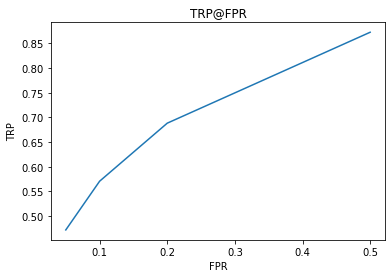

In [103]:
fpr = [0.5, 0.2, 0.1, 0.05]
plt.plot(fpr, tpr)

plt.xlabel ('FPR')
plt.ylabel ('TRP')

plt.title ('TRP@FPR')
plt.show ()

Ну так себе...

## Часть 3: Loss functions

При построении сети на примере 1 мы использовали обычные потери CE. Но есть еще много вариантов функций потерь, которые можно использовать для обучения нейронной сети. Мы обсудим два из них, которые являются наиболее популярными. Больше примеров потерь для распознавания лиц и обзоры их производительности вы можете найти в этой статье:https://arxiv.org/pdf/1901.05903.pdf

### TripletLoss

Это еще один вид потерь, который не требует наличия у модели последнего слоя классификации — он работает напрямую с эмбеддингами. Он требует, чтобы эмбеддинги одного человека были близки на пространстве эмбеддингов, а эмбеддинги разных людей были далеко друг от друга.

Эта функция имеет преимущество перед потерями, подобными CE: она не зависит от количества классов в датасете. Если у нас есть новые лица новых людей в датасете, нам не нужно будет полностью переобучать сеть, мы можем просто настроить обученную сеть на новых фотографиях.

**Как TripletLoss работает**:

Здесь архитектура нейронной сети будет немного отличаться от той, что была при использовании потери CE: в ней не будет последнего слоя классификации. Последний слой NN будет выводить эмбеддинги данной фотографии.

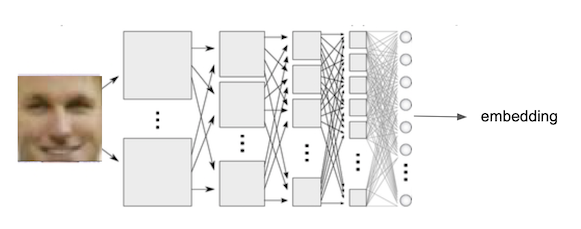

Функция TripletLoss работает напрямую с этими вложениями. Идея состоит в том, чтобы сделать вложения одних и тех же людей более близкими, компактными в пространстве вложений, а вложения разных людей более отдельными. Есть формула потери:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

гже
- $e$ эмбеддинг фото (output of a model)
- $p$ позитивный эмбеддинг для фото (эмбеддинг $e$ должен быть близок)
- $n$ негативный эмбеддинг для фото (эмбеддинг $e$ должен быть далек)
- $d(x, y)$ расстояние между эмбеддингами
- margin — позитивный margin для еще большего увеличения разницы мужду $d(a, p)$ и $d(a, n)$

**Все эмбеддинги $e$, $p$ и $n$ должны быть нормализованы для передачи в функцию потерь**.

В нашем случае для данной фотографии $E$ и ее эмбеддингом $e$ положительный эмбеддинг $p$ должен быть эмбеддингом фотографии того же человека, а эмбеддинг $n$ должен быть эмбеддингом фотографии другого человека.

Про TripletLoss for PyTorch можно прочесть [тут](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss). Существуют различные варианты TripletLoss, которые также могут повысить производительность и которые вы можете реализовать самостоятельно, если хотите:
- uиспользовать больше одного варианта $p$ и $n$ для одного эмбеддинга $e$ 
- использовать специальные негативные эмбеддинги: т.е. negatives, которые очень близко к e (для усиления отношения отдаления от e)


**Больше прочитать про TripletLoss**:

Как идея TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss

PyTorch пример TripletLoss: https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss

**Пример**: обучим модель на функции потерь TripletLoss.

In [105]:
transform_train = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [122]:
train_data = TripletDataset('train', transform_train)
val_data = TripletDataset('val', transform)
test_data = TripletDataset('test', transform)

batch_size = 8

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


In [123]:
torch.cuda.empty_cache()
gc.collect()

0

In [108]:
# model_efficientnet = timm.create_model('efficientnet_b3a', pretrained=True)
model_resnet = timm.create_model('resnet50', pretrained=True)

In [109]:
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [121]:
torch.cuda.empty_cache()
gc.collect()

453

In [111]:
model_resnet.fc = nn.Sequential(
    nn.Linear(2048, 256),
    nn.BatchNorm1d(256)
)
# model_efficientnet.classifier = nn.Sequential(
#     nn.Linear(1536, 256),
#     nn.BatchNorm1d(256)
# )
embeddingNetwork = model_resnet

In [112]:
classifierNetwork = classifierNet(embeddingNetwork)

In [113]:
classifierNetwork.to(device)

classifierNet(
  (embeddingLayer): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, ep

In [114]:
torch.cuda.empty_cache()
gc.collect()

0

In [115]:
optimizer = Adam(classifierNetwork.parameters(), lr=1e-4, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [116]:
distance_function=l_infinity
margin=1.5
swap=True

loss_fn = custom_loss(distance_function, margin, swap)

In [124]:
model, history = train_TripletLoss(
    train_data,
    val_data,
    model = classifierNetwork,
    epochs = 30,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = loss_fn
)

epoch:   0%|                                             | 0/30 [00:00<?, ?it/s]

loss 7.068136335312204


epoch:   3%|█▏                                | 1/30 [03:30<1:41:51, 210.73s/it]


Epoch 001 train_loss: 7.0681     val_loss 5.4893 train_acc 0.0692 val_acc 0.2551
loss 4.783787101395568


epoch:   7%|██▎                               | 2/30 [06:55<1:36:48, 207.44s/it]


Epoch 002 train_loss: 4.7838     val_loss 4.0593 train_acc 0.3666 val_acc 0.5272
loss 3.3960625913259244


epoch:  10%|███▍                              | 3/30 [10:21<1:32:52, 206.39s/it]


Epoch 003 train_loss: 3.3961     val_loss 3.5074 train_acc 0.6489 val_acc 0.6443
loss 2.728193495827221


epoch:  13%|████▌                             | 4/30 [13:46<1:29:21, 206.21s/it]


Epoch 004 train_loss: 2.7282     val_loss 3.3195 train_acc 0.7918 val_acc 0.6954
loss 2.413934456275197


epoch:  17%|█████▋                            | 5/30 [17:10<1:25:32, 205.28s/it]


Epoch 005 train_loss: 2.4139     val_loss 3.3332 train_acc 0.8606 val_acc 0.7061
loss 2.2707179342762807


epoch:  20%|██████▊                           | 6/30 [20:27<1:20:55, 202.32s/it]


Epoch 006 train_loss: 2.2707     val_loss 3.3294 train_acc 0.8922 val_acc 0.7098
loss 2.2018137377746094


epoch:  23%|███████▉                          | 7/30 [23:44<1:16:57, 200.76s/it]


Epoch 007 train_loss: 2.2018     val_loss 3.2712 train_acc 0.9116 val_acc 0.7274
loss 2.1665249917837563


epoch:  27%|█████████                         | 8/30 [27:06<1:13:42, 201.01s/it]


Epoch 008 train_loss: 2.1665     val_loss 3.3685 train_acc 0.9158 val_acc 0.7125
loss 2.1018963736318024


epoch:  30%|██████████▏                       | 9/30 [30:22<1:09:47, 199.42s/it]


Epoch 009 train_loss: 2.1019     val_loss 3.2394 train_acc 0.9294 val_acc 0.7646
loss 2.0727857691741614


epoch:  33%|███████████                      | 10/30 [33:36<1:05:59, 197.96s/it]


Epoch 010 train_loss: 2.0728     val_loss 3.2317 train_acc 0.9329 val_acc 0.7561
loss 2.0527846851152427


epoch:  37%|████████████                     | 11/30 [36:56<1:02:48, 198.32s/it]


Epoch 011 train_loss: 2.0528     val_loss 3.1348 train_acc 0.9368 val_acc 0.7599
loss 2.0153348663549746


epoch:  40%|██████████████                     | 12/30 [40:11<59:15, 197.55s/it]


Epoch 012 train_loss: 2.0153     val_loss 3.1614 train_acc 0.9455 val_acc 0.7748
loss 1.9969748102323839


epoch:  43%|███████████████▏                   | 13/30 [43:29<55:57, 197.49s/it]


Epoch 013 train_loss: 1.9970     val_loss 3.2030 train_acc 0.9484 val_acc 0.7593
loss 1.977216291070431


epoch:  47%|████████████████▎                  | 14/30 [46:45<52:33, 197.07s/it]


Epoch 014 train_loss: 1.9772     val_loss 3.1735 train_acc 0.9510 val_acc 0.7673
loss 1.9354396687911244


epoch:  50%|█████████████████▌                 | 15/30 [50:04<49:27, 197.86s/it]


Epoch 015 train_loss: 1.9354     val_loss 3.2354 train_acc 0.9624 val_acc 0.7657
loss 1.9513711276349057


epoch:  53%|██████████████████▋                | 16/30 [53:26<46:27, 199.08s/it]


Epoch 016 train_loss: 1.9514     val_loss 3.2227 train_acc 0.9546 val_acc 0.7556
loss 1.9588762729355458


epoch:  57%|███████████████████▊               | 17/30 [56:47<43:12, 199.42s/it]


Epoch 017 train_loss: 1.9589     val_loss 3.2298 train_acc 0.9531 val_acc 0.7646
loss 1.8950603213649564


epoch:  60%|███████████████████▊             | 18/30 [1:00:09<40:04, 200.38s/it]


Epoch 018 train_loss: 1.8951     val_loss 3.1044 train_acc 0.9675 val_acc 0.7812
loss 1.9088234611218342


epoch:  63%|████████████████████▉            | 19/30 [1:03:29<36:41, 200.14s/it]


Epoch 019 train_loss: 1.9088     val_loss 3.7437 train_acc 0.9627 val_acc 0.7668
loss 1.8774168426624398


epoch:  67%|██████████████████████           | 20/30 [1:06:46<33:13, 199.33s/it]


Epoch 020 train_loss: 1.8774     val_loss 3.1538 train_acc 0.9689 val_acc 0.7982
loss 1.8857481730787942


epoch:  70%|███████████████████████          | 21/30 [1:10:04<29:49, 198.81s/it]


Epoch 021 train_loss: 1.8857     val_loss 3.2027 train_acc 0.9649 val_acc 0.7742
loss 1.8701868624276436


epoch:  73%|████████████████████████▏        | 22/30 [1:13:26<26:37, 199.74s/it]


Epoch 022 train_loss: 1.8702     val_loss 3.2039 train_acc 0.9662 val_acc 0.7769
loss 1.8586819895197837


epoch:  77%|█████████████████████████▎       | 23/30 [1:16:48<23:23, 200.57s/it]


Epoch 023 train_loss: 1.8587     val_loss 3.2756 train_acc 0.9685 val_acc 0.7625
loss 1.8599711560577936


epoch:  80%|██████████████████████████▍      | 24/30 [1:20:10<20:05, 200.94s/it]


Epoch 024 train_loss: 1.8600     val_loss 3.0898 train_acc 0.9693 val_acc 0.7865
loss 1.8324373838830084


epoch:  83%|███████████████████████████▌     | 25/30 [1:23:31<16:44, 200.86s/it]


Epoch 025 train_loss: 1.8324     val_loss 3.1899 train_acc 0.9728 val_acc 0.7790
loss 1.8388112255473261


epoch:  87%|████████████████████████████▌    | 26/30 [1:26:50<13:21, 200.27s/it]


Epoch 026 train_loss: 1.8388     val_loss 3.1612 train_acc 0.9711 val_acc 0.7827
loss 1.814409749338243


epoch:  90%|█████████████████████████████▋   | 27/30 [1:30:10<10:00, 200.20s/it]


Epoch 027 train_loss: 1.8144     val_loss 3.1075 train_acc 0.9753 val_acc 0.7764
loss 1.8423983158913444


epoch:  93%|██████████████████████████████▊  | 28/30 [1:33:29<06:40, 200.09s/it]


Epoch 028 train_loss: 1.8424     val_loss 3.1749 train_acc 0.9676 val_acc 0.7817
loss 1.8023013677936368


epoch:  97%|███████████████████████████████▉ | 29/30 [1:36:48<03:19, 199.77s/it]


Epoch 029 train_loss: 1.8023     val_loss 2.9655 train_acc 0.9754 val_acc 0.8056
loss 1.7514053180199884


epoch: 100%|█████████████████████████████████| 30/30 [1:40:05<00:00, 200.20s/it]


Epoch 030 train_loss: 1.7514     val_loss 3.0999 train_acc 0.9851 val_acc 0.7801
Best val Loss: 0.805644


In [125]:
torch.save(model.state_dict(), 'model_TripletLoss_30_.pth')

In [126]:
model = classifierNetwork

In [127]:
model.to(device)
model.load_state_dict(torch.load('model_TripletLoss_30_.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [128]:
epoch, loss, val_loss, acc, val_acc = zip(*history)

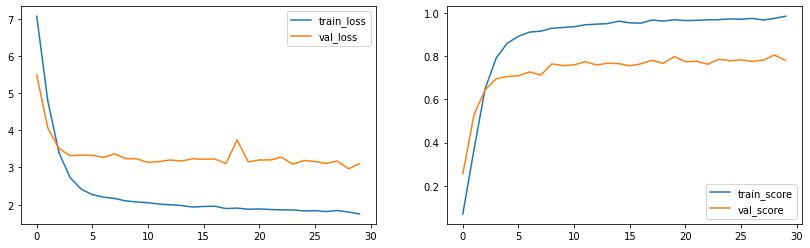

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

In [130]:
# model.to(device)
# model.load_state_dict(torch.load('model_TripletLoss_50_.pth', map_location=torch.device(device)))

In [131]:
test_accuracy, test_loss = evaluate_TripletLoss(model, test_loader, loss_fn)
test_accuracy, test_loss

(array(0.7702958, dtype=float32), 3.16802800180924)

С данной метрикой лосса модель показала результат в 0.76463187 даже при 10 эпохах

### ArcFace Loss (Additive Angular Margin Loss)

Этот лосс является чем-то вроде "SOTA" для систем распознавания лиц (в чем-то — потому что на самом деле разные варианты потерь и их комбинации могут быть оптимальными для разных сетевых архитектур). Эта потеря наследует идею потери CE, но развивает ее для достижения лучшего распределения вложений на сфере. Он вводит некоторые геодезические ограничения для повышения компактности внутри класса и несоответствия между классами.

**Как работает ArcFace loss**:

Этот лосс является разновидностью стандартного лосса SoftMax CE, который заставляет эмбеддинги разных классов (людей) быть дальше: иметь более разреженное представление эмбеддингов в пространстве эмбеддингов, обеспечивать более очевидный разрыв между ближайшими классами.

Стандартный SoftMax CE loss для задачи классификации выглядит так:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

где:
- $x_i \in \mathbb{R^d}$ обозначает глубокий признак $i$-го образца, принадлежащего $y_i$-му классу;
- $W_j \in \mathbb{R^d}$ обозначает j-й столбец веса;
- $W \in \mathbb{R^d}$ и $b_j \in \mathbb{R^d}$ это смещение (bias);
- $N$ — размер batch'а;
- $n$ — номер класса.

Похоже, что, хотя эта потеря работает хорошо, она явно не оптимизирует встраивание признаков, чтобы обеспечить более высокое сходство для внутриклассовых выборок и разнообразие для межклассовых выборок, что приводит к разрыву в производительности для глубокого распознавания лиц при больших внутриклассовых выборках. вариации внешнего вида класса.

Давайте немного поработаем над этой формулой потерь:
- приравняем bias $b_j=0$;
- нормализуем веса ||$W_j$|| = 1;
- номализуем эмбеддинги ||$x_i$|| = 1 и маштабируем его до s (s это гиперпараметр)

Шаг нормализации эмбеддингов и весов делает предсказания зависящими только от угла между вложением и весом. Таким образом, изученные вложения распределяются по гиперсфере радиусом s.

Тогда наша loss function будет:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Последний шаг: давайте добавим аддитивный штраф за угловой запас $m$ между $x_i$ и $W_{y_i}$, чтобы одновременно повысить компактность внутри класса и несоответствие между классами:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Вот наша ArcFace loss. И мы можем играться с 2 гиперпараметрами: s и m.

В оригинале почитать о ArcFace: https://arxiv.org/pdf/1801.07698.pdf

Оригинальный репозиторий с примером: https://github.com/deepinsight/insightface

**Пример**: обучим нашу модель с использованием функции потерь - ArcFace loss.

In [133]:
transform_train = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_data = celebADataset('train', transform_train)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

# choose your own batch_size
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


In [45]:
#!g1.1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [46]:
#!g1.1
!nvidia-smi
# import torch
torch.cuda.is_available()

Sat Jan 28 15:41:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.13    Driver Version: 525.60.13    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:02:00.0  On |                  N/A |
|  0%   43C    P8    23W / 220W |    256MiB /  8192MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [136]:
model_resnet = timm.create_model('resnet50', pretrained=True)

In [137]:
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [138]:
model_resnet.fc = nn.Sequential(
    nn.Linear(2048, 256),
    nn.BatchNorm1d(256)
)
embeddingNetwork = model_resnet

In [139]:
embeddingNetwork

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [140]:
classifierNetWork_ArcFace = classifierNet_ArcFace(embeddingNetwork)
classifierNetWork_ArcFace.to(device)

classifierNet_ArcFace(
  (embeddingLayer): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d

In [141]:
optimizer = Adam(classifierNetWork_ArcFace.parameters(), lr=1e-3, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [150]:
torch.cuda.empty_cache()
gc.collect()

6535

In [143]:
n_classes = n_classes
embedding_size = 256
margin = 28.6
scale = 64

loss_fn = custom_loss_ArcFace(n_classes, embedding_size, margin, scale)

In [144]:
model, history = train_ArcFace(
    train_data,
    val_data,
    model = classifierNetWork_ArcFace,
    epochs = 30,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = loss_fn
)

epoch:   0%|                                             | 0/30 [00:00<?, ?it/s]

loss 44.962117798765945


epoch:   3%|█▏                                   | 1/30 [00:58<28:25, 58.81s/it]


Epoch 001 train_loss: 44.9621     val_loss 42.1093 train_acc 0.0150 val_acc 0.0399
loss 39.163323048795206


epoch:   7%|██▍                                  | 2/30 [01:57<27:20, 58.59s/it]


Epoch 002 train_loss: 39.1633     val_loss 38.0948 train_acc 0.1554 val_acc 0.2812
loss 32.57276682192913


epoch:  10%|███▋                                 | 3/30 [02:55<26:15, 58.37s/it]


Epoch 003 train_loss: 32.5728     val_loss 34.1491 train_acc 0.5037 val_acc 0.4894
loss 24.766443188270827


epoch:  13%|████▉                                | 4/30 [03:54<25:20, 58.49s/it]


Epoch 004 train_loss: 24.7664     val_loss 30.3497 train_acc 0.7815 val_acc 0.6187
loss 17.420448146062842


epoch:  17%|██████▏                              | 5/30 [04:52<24:23, 58.55s/it]


Epoch 005 train_loss: 17.4204     val_loss 27.6266 train_acc 0.9211 val_acc 0.6715
loss 11.172554537598113


epoch:  20%|███████▍                             | 6/30 [05:50<23:21, 58.38s/it]


Epoch 006 train_loss: 11.1726     val_loss 24.7300 train_acc 0.9764 val_acc 0.7151
loss 6.649508745929275


epoch:  23%|████████▋                            | 7/30 [06:48<22:20, 58.26s/it]


Epoch 007 train_loss: 6.6495     val_loss 23.2325 train_acc 0.9933 val_acc 0.7268
loss 3.537312664789207


epoch:  27%|█████████▊                           | 8/30 [07:46<21:20, 58.23s/it]


Epoch 008 train_loss: 3.5373     val_loss 22.3902 train_acc 0.9988 val_acc 0.7252
loss 1.9472905640744984


epoch:  30%|███████████                          | 9/30 [08:44<20:20, 58.11s/it]


Epoch 009 train_loss: 1.9473     val_loss 22.1755 train_acc 0.9992 val_acc 0.7300
loss 1.0068727302249898


epoch:  33%|████████████                        | 10/30 [09:42<19:20, 58.02s/it]


Epoch 010 train_loss: 1.0069     val_loss 21.8642 train_acc 0.9998 val_acc 0.7306
loss 0.6981209845243769


epoch:  37%|█████████████▏                      | 11/30 [10:40<18:22, 58.02s/it]


Epoch 011 train_loss: 0.6981     val_loss 20.9250 train_acc 1.0000 val_acc 0.7300
loss 0.5934858556683367


epoch:  40%|██████████████▍                     | 12/30 [11:38<17:24, 58.01s/it]


Epoch 012 train_loss: 0.5935     val_loss 21.2419 train_acc 0.9998 val_acc 0.7370
loss 0.5896544077813849


epoch:  43%|███████████████▌                    | 13/30 [12:36<16:25, 57.95s/it]


Epoch 013 train_loss: 0.5897     val_loss 22.3540 train_acc 0.9994 val_acc 0.7146
loss 0.5679989672974031


epoch:  47%|████████████████▊                   | 14/30 [13:34<15:29, 58.11s/it]


Epoch 014 train_loss: 0.5680     val_loss 21.8445 train_acc 0.9996 val_acc 0.7226
loss 0.6154882676466908


epoch:  50%|██████████████████                  | 15/30 [14:32<14:31, 58.10s/it]


Epoch 015 train_loss: 0.6155     val_loss 21.3468 train_acc 0.9996 val_acc 0.7327
loss 0.7385007859755321


epoch:  53%|███████████████████▏                | 16/30 [15:30<13:32, 58.02s/it]


Epoch 016 train_loss: 0.7385     val_loss 21.4515 train_acc 0.9994 val_acc 0.7263
loss 0.6204879892369112


epoch:  57%|████████████████████▍               | 17/30 [16:29<12:36, 58.22s/it]


Epoch 017 train_loss: 0.6205     val_loss 20.7954 train_acc 0.9992 val_acc 0.7311
loss 0.5438916907063249


epoch:  60%|█████████████████████▌              | 18/30 [17:27<11:38, 58.22s/it]


Epoch 018 train_loss: 0.5439     val_loss 20.9032 train_acc 0.9996 val_acc 0.7252
loss 0.666912099329078


epoch:  63%|██████████████████████▊             | 19/30 [18:25<10:38, 58.01s/it]


Epoch 019 train_loss: 0.6669     val_loss 20.4754 train_acc 0.9996 val_acc 0.7380
loss 0.6470740786771035


epoch:  67%|████████████████████████            | 20/30 [19:22<09:39, 57.90s/it]


Epoch 020 train_loss: 0.6471     val_loss 20.8307 train_acc 0.9999 val_acc 0.7306
loss 0.5235014981468128


epoch:  70%|█████████████████████████▏          | 21/30 [20:20<08:40, 57.87s/it]


Epoch 021 train_loss: 0.5235     val_loss 20.8749 train_acc 0.9993 val_acc 0.7204
loss 0.5095511492122007


epoch:  73%|██████████████████████████▍         | 22/30 [21:18<07:42, 57.83s/it]


Epoch 022 train_loss: 0.5096     val_loss 20.4891 train_acc 0.9993 val_acc 0.7242
loss 0.49234495265888967


epoch:  77%|███████████████████████████▌        | 23/30 [22:16<06:44, 57.81s/it]


Epoch 023 train_loss: 0.4923     val_loss 19.8945 train_acc 0.9998 val_acc 0.7460
loss 0.5772376268097524


epoch:  80%|████████████████████████████▊       | 24/30 [23:13<05:46, 57.76s/it]


Epoch 024 train_loss: 0.5772     val_loss 19.9517 train_acc 0.9994 val_acc 0.7364
loss 0.44798043545153277


epoch:  83%|██████████████████████████████      | 25/30 [24:12<04:49, 57.94s/it]


Epoch 025 train_loss: 0.4480     val_loss 19.4884 train_acc 0.9996 val_acc 0.7513
loss 0.5258081063745048


epoch:  87%|███████████████████████████████▏    | 26/30 [25:09<03:51, 57.85s/it]


Epoch 026 train_loss: 0.5258     val_loss 19.5352 train_acc 0.9991 val_acc 0.7364
loss 0.37256950607622735


epoch:  90%|████████████████████████████████▍   | 27/30 [26:07<02:53, 57.82s/it]


Epoch 027 train_loss: 0.3726     val_loss 19.2110 train_acc 0.9993 val_acc 0.7476
loss 0.3067480764410211


epoch:  93%|█████████████████████████████████▌  | 28/30 [27:05<01:55, 57.80s/it]


Epoch 028 train_loss: 0.3067     val_loss 19.0580 train_acc 0.9999 val_acc 0.7503
loss 0.46694899185613836


epoch:  97%|██████████████████████████████████▊ | 29/30 [28:03<00:57, 57.84s/it]


Epoch 029 train_loss: 0.4669     val_loss 19.8865 train_acc 0.9988 val_acc 0.7338
loss 0.3876937608795296


epoch: 100%|████████████████████████████████████| 30/30 [29:01<00:00, 58.05s/it]


Epoch 030 train_loss: 0.3877     val_loss 19.7908 train_acc 0.9995 val_acc 0.7236
Best val Loss: 0.751331


In [145]:
torch.save(model.state_dict(), 'model_ArcFace_30.pth')

In [146]:
model.to(device)
model.load_state_dict(torch.load('model_ArcFace_30.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [147]:
epoch, loss, val_loss, acc, val_acc = zip(*history)

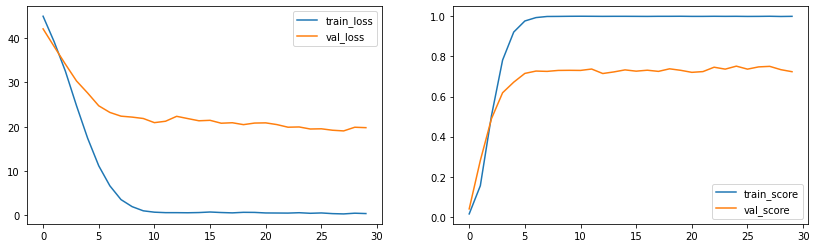

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

In [149]:
test_accuracy, test_loss = evaluate_ArcFace(model, test_loader, loss_fn)
test_accuracy, test_loss

(array(0.7331655, dtype=float32), 19.572435207366944)

С данной метрикой лосса модель показала результат в 0.7426054 тоже при 10 эпохах